In [1]:
from dask.distributed import Client
client = Client('scheduler-address:8786')
client

<Client: scheduler='inproc://10.106.31.2/13409/1' processes=1 cores=4>

In [2]:
import pandas as pd
from streamz.dataframe import DataFrame, Random

source = Random(interval='100ms', freq='5ms', dask=True)


In [3]:
source.tail(5)

Output()

In [4]:
source.window('5s').groupby('y').mean()

Output()

In [6]:
sdf = (source - 0.5).cumsum()


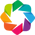

In [5]:
import streamz.dataframe.holoviews

In [8]:
DataFrame({'raw': sdf.x,
           'smooth': sdf.x.rolling('100ms').mean(),
           'very-smooth': sdf.x.rolling('500ms').mean(),
           }).plot.line()

:DynamicMap   []

In [ ]:
abs(source.window('5s').groupby('y').mean()).plot.bar()